In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
 

In [5]:
file_path ="/Users/mayurimamdi/Documents/HotelBooking/HotelBookingSystem/data/processed/hotel_bookings_cleaned.csv"

In [6]:
df=pd.read_csv(file_path)

In [7]:
df.shape

(87396, 32)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87395 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87395 non-null  object 
 1   is_canceled                     87395 non-null  int64  
 2   lead_time                       87395 non-null  int64  
 3   arrival_date_year               87395 non-null  int64  
 4   arrival_date_month              87395 non-null  object 
 5   arrival_date_week_number        87395 non-null  int64  
 6   arrival_date_day_of_month       87395 non-null  int64  
 7   stays_in_weekend_nights         87395 non-null  int64  
 8   stays_in_week_nights            87395 non-null  int64  
 9   adults                          87395 non-null  int64  
 10  children                        87395 non-null  float64
 11  babies                          87395 non-null  int64  
 12  meal                            87395

Here the Children and agent should be in integer and the reservation status date should be in datetime type

In [31]:
df['children'] = df['children'].astype(int)


In [33]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [35]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

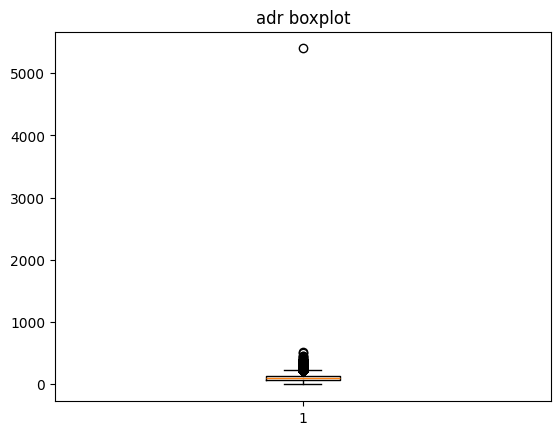

In [10]:
plt.boxplot(df["adr"])
plt.title('adr boxplot')
plt.show()

In [11]:
df['adr'].describe()

count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [14]:
df[df["adr"] > 500].shape


(3, 32)

Remove negative ADR

In [15]:
df=df[df['adr']>=0]

In [25]:
Q1 = df["adr"].quantile(0.25)
Q3 = df["adr"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_iqr = df[(df["adr"] >= lower) & (df["adr"] <= upper)]


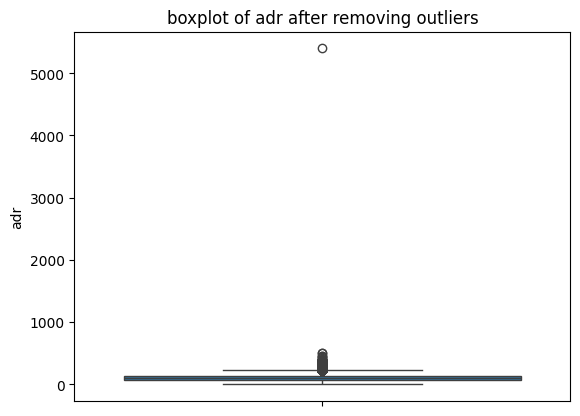

In [36]:
sns.boxplot(df['adr'])
plt.title('boxplot of adr after removing outliers')
plt.show()

In [40]:
df[df["adr"] > 1000].shape


(1, 32)

LETS CHECK THE ROW FOR THAT OUTLIER

In [42]:
df[df['adr']>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
38749,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,No Corporate Booking,0,Transient,5400.0,0,0,Canceled,2016-02-19


Since there is just one entry out of so many,

It does seem like an outlier, so lets do winsorization

In [16]:
df['adr'].describe()

count    87395.000000
mean       106.338536
std         55.012947
min          0.000000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [43]:
adr_cap=df['adr'].quantile(0.99)
df["adr"] = df["adr"].clip(upper=adr_cap)

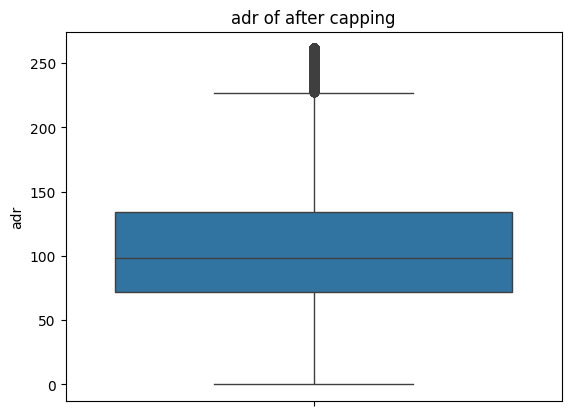

In [44]:
sns.boxplot(df['adr'])
plt.title('adr of after capping')
plt.show()

In [17]:
df['arrival_date_day_of_month'].describe()

count    87395.000000
mean        15.815665
std          8.835121
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

In [18]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    42391
2017    31691
2015    13313
Name: count, dtype: int64

In [19]:
df['booking_changes'].describe()

count    87395.000000
mean         0.271583
std          0.727226
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: booking_changes, dtype: float64

In [23]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    43893
1    29017
2    11812
3     2317
4      320
5       36
Name: count, dtype: int64

In [24]:
df['assigned_room_type'].value_counts()

assigned_room_type
A    46313
D    22432
E     7195
F     3627
G     2498
C     2165
B     1820
H      705
I      357
K      276
P        6
L        1
Name: count, dtype: int64

In [27]:
df['arrival_date_month'].value_counts()


arrival_date_month
August       11257
July         10057
May           8355
April         7908
June          7765
March         7512
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64

In [45]:
df.to_csv("../data/processed/hotel_bookings_cleaned.csv", index=False)
